In [3]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import re

In [4]:
nlp = spacy.load("en_core_web_sm")
with open('output.txt', 'r', encoding='utf-8') as file:
    novel_text = file.read()

doc = nlp(novel_text)
characters = [ent.text.strip() for ent in doc.ents if ent.label_ == "PERSON"]
characters = [re.sub(r'[\n\x02]', '', char) for char in characters]
character_mapping = {}
for i, char in enumerate(characters):
    character_mapping[f'Character{i+1}'] = char

characters = [character_mapping.get(char, char) for char in characters]
unique_characters = list(set(characters))


In [5]:
print(unique_characters)

['H.“', 'Vernon Dursley', 'Norbert', 'Harry Potter Day', 'Harry Potter', 'Percy', 'Devon', 'Phyllida Spore', 'Mighta bin a dragon', 'Nicholas de Mimsy', 'Chaser Angelina Johnson', 'Aunt Petunia', 'Albus Dumbled', 'Unicorn', 'Harry and Ron', 'Harry felt', 'Harry had', 'Gordon', 'Harry swung', 'Fred or', 'Willard', 'Harvey', 'Rubeus Hagrid', 'Fang', 'Seamus', 'Emeric Switch', 'Cokeworth Harry', 'Nicholas', 'Hufflepuff', 'Jordan', 'Quidditch', 'Wood', 'Fred and George stole', 'Lee', 'Seekers', 'Morgana', 'Ron grumpily', 'Put-Outer', 'the Leaky Cauldron', 'Nah', 'Dedalus Diggle', 'Bathilda Bagshot Magical Theory', 'Voldemort', 'Uncle Algie', 'Parvati Patil', 'Harry, Ron and Hermione', 'Angela Biola', 'Mighta', 'Marcus Flint', 'Harry whispered', 'Harry knew Ron', 'Harry moved', 'strawberry', 'Harry borrowed Ron’s', 'Terry', 'Robert Slimbach', 'Hedwig', 'Harry quietly', 'Shut', 'Stonewall High', 'Muggles', 'don', 'Leaky', 'Pomfrey', 'Pince', 'Harry, Hermione', 'Griphook', 'Boa Constrictor', 

In [11]:
len(unique_characters)

310

In [18]:
#removing unwanted ele
remov_list=['H.“','Harry Potter Day','Devon', 'Phyllida Spore', 'Mighta bin a dragon', 'Unicorn', 'Harry and Ron','Wood', 'Fred and George stole', 'Lee', 'Seekers', 'Morgana', 'Ron grumpily', 'Put-Outer', 'Uncle Algie','Harry, Ron and Hermione', 'Angela Biola', 'Mighta', 'Marcus Flint', 'Harry whispered', 'Harry knew Ron', 'Harry quietly', 'Shut', 'Stonewall High', 'Muggles', 'don', 'Leaky', 'Pomfrey', 'Pince', 'Harry, Hermione', 'Griphook', 'Boa Constrictor', 'Licorice Wands', 'the Gryffindor Beater', 'Mommy', 'Christmas', 'Bin', 'Chaser', 'Angelina — Keeper Bletchley', 'Harry moved', 'strawberry', 'Harry borrowed Ron’s', 'Terry', 'Robert Slimbach','the Leaky Cauldron', 'Nah', 'Dedalus Diggle', 'Bathilda Bagshot Magical Theory',  'Harry felt', 'Emeric Switch','Hermione Granger' 'Cokeworth Harry','Harry had', 'Gordon', 'Harry swung', 'Fred or',  'Library', 'Elixir', 'nothin’', 'Harry gasped', 'Harry darkly', 'bin waitin', 'Oliver Wood', 'Algie','ERISED hristmas', 'Dedalus Diggle’s','Hmm', 'Don', 'Harry, Ron', 'Adalbert Waffling', 'Figg', 'bush', 'Grand Sorc', 'Mummy', 'Madam', 'Knuts', 'Malfoy', 'Ron', 'n’t Neville', 'Trevor', 'Yorkshire', 'Bane', 'Reckon Dumbledore’s','Lee Jordan’s', 'Adrian Pucey', 'Patil', 'Friar', 'Neville Longbottom', 'Harry two', 'Gringotts', 'Head Boy', 'Ted', 'Yvonne', 'Harry hardly', 'Piers Polkiss', 'Harry’s', 'Marge', 'Lily', 'Fred Weasley', 'Bin lecturin', 'Harry CHAPTER', 'Aunt', 'Lee Jordan', 'Aaah', 'Claude Garamond','Harry remembered Ron', 'Wizard sport', 'Alicia Spinnet', 'Albus Dumbledore', 'Harry hung', 'The Leaky Cauldron', 'Ollivander', 'Peevsie', 'Malcolm', 'Gryffindors', 'Harry eagerly', 'Dursley', 'Terence Higgs', 'Cauldron Cakes', 'Crabbe and Goyle', 'Harry outta', 'Flitwick', 'Bill','Harry Hunting', 'Harry blankly', 'Firs', 'Firenze', 'Haaaaaa', 'Oliver', 'Locomotor Mortis', 'Harry', 'Fred and George', 'Longbottom', 'Newt Scamander', 'Perenelle', 'Curse', 'Dark', 'Agrippa', 'Mom', 'knew yeh didn', 'Galleons', 'Minerva McGonagall', 'Vampires', 'bin killin', 'Hurry', 'Diagon Alley', 'Uncle', 'Fer', 'Hannah', 'Ron darkly', 'Bertie Bott’s', 'Dean', 'Sprout', 'n’t Malfoy', 'Gryffindor Tower', 'Potions', 'Norris', 'Hermione Granger’s', 'Arsenius Jigger DIAGON', 'Levi', 'Miss Granger', 'Filch', 'Vernon', 'Nicolas', 'Gran', 'Snot', 'fer yeh', 'Atta', 'Fred', 'Draco Malfoy', 'Tufty', 'yeh don', 'Miranda Goshawk', 'Harry nodded', 'Ron eagerly', 'Wizard', 'Nicholas de Mimsy-Porpington', 'KILL HIM', 'Uncle Vernon’s', 'Everywhere Harry',  'Charlie Weasley', 'Ronan', 'David Saylor', 'Seamus Finnigan', 'Ginny', 'Brown', 'Wizard indeed', 'Paracelsus', 'Jell', 'Spinnet', 'Fred and George Weasley',  'Dennis', 'Flamel', 'Next Door', 'Goyle', 'Charlie CHAPTER', 'Dean Thomas', 'Fungi', 'Leviosa', 'Percy Weasley', 'Dudley', 'Harry told', 'Howard',  'Angelina Johnson', 'Ronniekins', 'Nimbus', 'Harry stayed', 'Wizard Baruffio', 'Granger','Willard', 'Harvey','Nicholas de Mimsy', 'Chaser Angelina Johnson',]
unique_characters = [item for item in unique_characters if item not in remov_list]

In [22]:
unique_characters.append('Griffindor')

In [23]:
print(unique_characters)

['Vernon Dursley', 'Norbert', 'Harry Potter', 'Percy', 'Aunt Petunia', 'Albus Dumbled', 'Rubeus Hagrid', 'Fang', 'Seamus', 'Nicholas', 'Hufflepuff', 'Jordan', 'Quidditch', 'Voldemort', 'Parvati Patil', 'Hedwig', 'Severus', 'Dark Magic', 'Blimey', 'Potter', 'Ginny Weasley', 'Potters', 'Ron Weasley', 'Snape', 'Ronald Weasley', 'Weasleys', 'Hogwarts', 'Hooch', 'Baron', 'Neville', 'Nicolas Flamel', 'Jim McGuffin', 'Astronomy Tower', 'Vol', 'Malkin’s Robes', 'Harry, Malfoy', 'Chocolate Frogs', 'Kent', 'Paws', 'yeh everythin’', 'George.', 'Gryffindor', 'Vindictus Viridian', 'Dumbledore', 'Hermione Granger', 'Jim', 'Pansy Parkinson', 'Percy chase Fred and George', 'Smelting', 'Susan', 'bin', 'Harold', 'Mother', 'H. Potter', 'Ron — Ron', 'Crabbe', 'Quaffle', 'Muggle', 'James', 'Weasley', 'Thomas', 'Charlie', 'Uncle Vernon', 'Ron prodding Dean’s', 'Tom', 'Seeker', 'Cupboard', 'Harry miserably', 'Smeltings', 'Surrey', 'Ron bitterly', 'McGonagall', 'Alohomora Charm', 'Quirrell', 'Bludger', 'Fred 

In [24]:
len(unique_characters)

102

In [25]:
G = nx.Graph()
for sentence in doc.sents:
    sentence_characters = [ent.text.strip() for ent in sentence.ents if ent.text.strip() in unique_characters]
    for char1 in sentence_characters:
        for char2 in sentence_characters:
            if char1 != char2:
                G.add_edge(char1, char2)

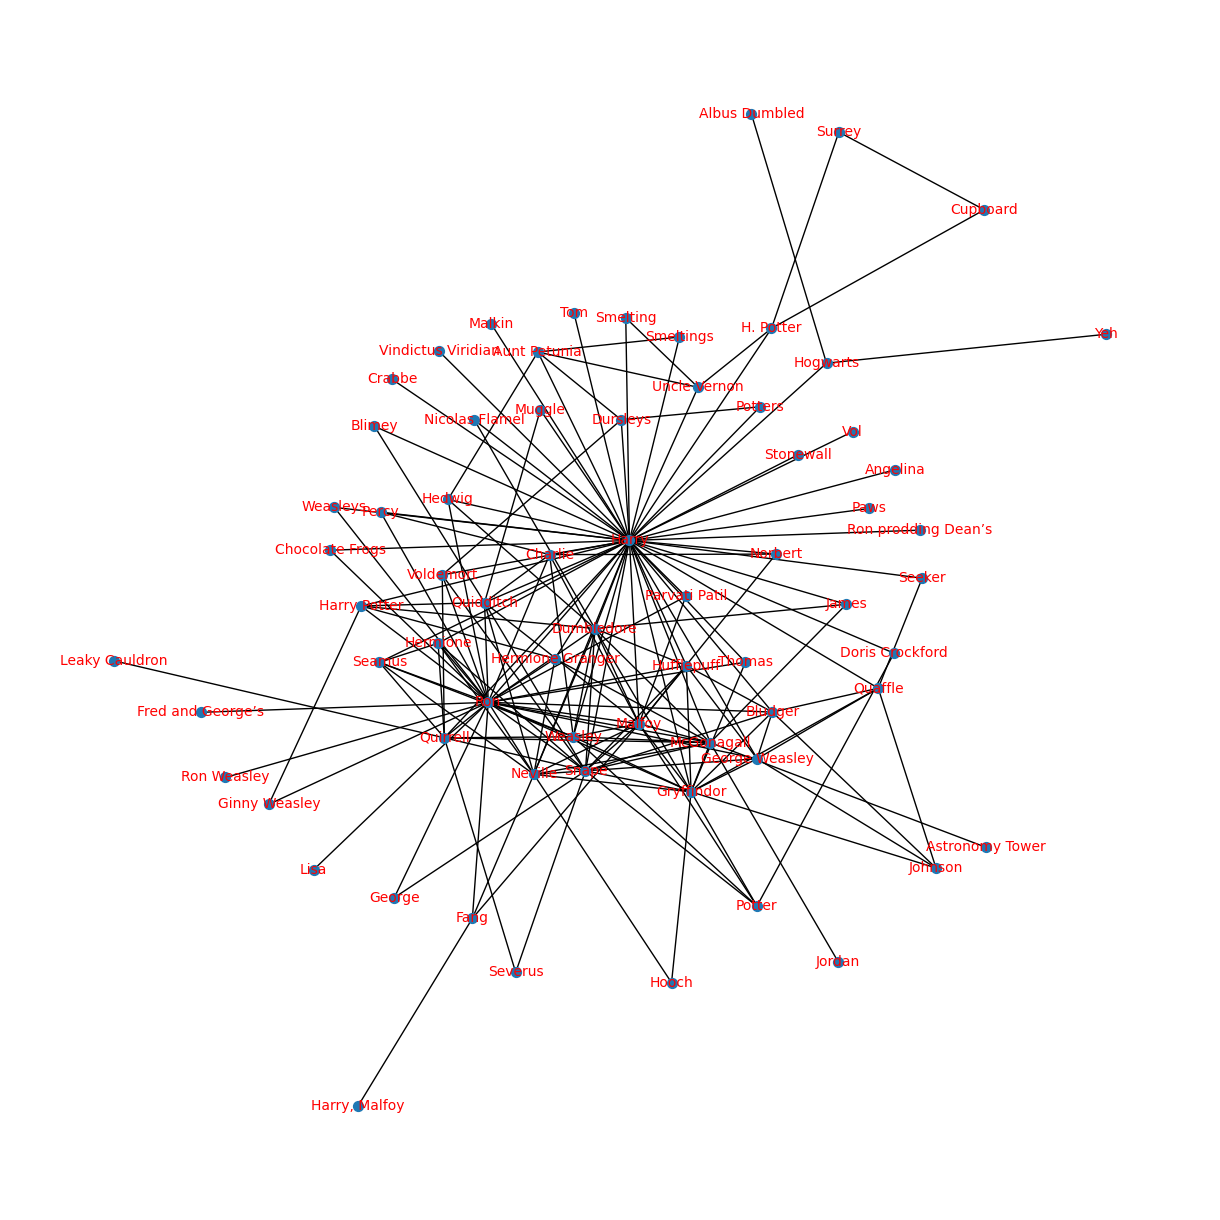

In [26]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=50, font_color='red')
plt.show()

In [27]:
len(G)

69

In [28]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
pagerank_centrality = nx.pagerank(G)

In [29]:
degree_centrality

{'Dursleys': 0.058823529411764705,
 'Potters': 0.029411764705882353,
 'McGonagall': 0.19117647058823528,
 'Dumbledore': 0.19117647058823528,
 'Harry': 0.7352941176470588,
 'James': 0.044117647058823525,
 'Uncle Vernon': 0.058823529411764705,
 'Aunt Petunia': 0.07352941176470588,
 'Paws': 0.014705882352941176,
 'Stonewall': 0.014705882352941176,
 'Smeltings': 0.029411764705882353,
 'Smelting': 0.029411764705882353,
 'H. Potter': 0.058823529411764705,
 'Cupboard': 0.029411764705882353,
 'Surrey': 0.029411764705882353,
 'Hogwarts': 0.044117647058823525,
 'Albus Dumbled': 0.014705882352941176,
 'Muggle': 0.029411764705882353,
 'Tom': 0.014705882352941176,
 'Doris Crockford': 0.029411764705882353,
 'Potter': 0.07352941176470588,
 'Quirrell': 0.14705882352941177,
 'Malkin': 0.014705882352941176,
 'Quidditch': 0.1323529411764706,
 'Blimey': 0.029411764705882353,
 'Hufflepuff': 0.11764705882352941,
 'Vindictus Viridian': 0.014705882352941176,
 'Leaky Cauldron': 0.014705882352941176,
 'Hedwig':

In [32]:
betweenness_centrality

{'Dursleys': 0.0006584723441615452,
 'Potters': 0.0,
 'McGonagall': 0.0635803385474149,
 'Dumbledore': 0.011886605005569009,
 'Harry': 0.6718081760937337,
 'James': 0.0,
 'Uncle Vernon': 0.0015364354697102723,
 'Aunt Petunia': 0.0013169446883230904,
 'Paws': 0.0,
 'Stonewall': 0.0,
 'Smeltings': 0.0,
 'Smelting': 0.0,
 'H. Potter': 0.05794556628621598,
 'Cupboard': 0.0,
 'Surrey': 0.0,
 'Hogwarts': 0.058384547848990345,
 'Albus Dumbled': 0.0,
 'Muggle': 0.0,
 'Tom': 0.0,
 'Doris Crockford': 0.00242594506751662,
 'Potter': 0.00167910447761194,
 'Quirrell': 0.041966114804130615,
 'Malkin': 0.0,
 'Quidditch': 0.007739663029390859,
 'Blimey': 0.0,
 'Hufflepuff': 0.0003511852502194908,
 'Vindictus Viridian': 0.0,
 'Leaky Cauldron': 0.0,
 'Hedwig': 0.0016095990635059993,
 'Ron': 0.19876935083256414,
 'Fred and George’s': 0.0,
 'Charlie': 0.0019235373932476655,
 'Percy': 0.0,
 'Voldemort': 0.0024143985952589995,
 'Chocolate Frogs': 0.0,
 'Nicolas Flamel': 0.0,
 'Ron Weasley': 0.0,
 'Harry Pot

In [33]:
closeness_centrality

{'Dursleys': 0.4503311258278146,
 'Potters': 0.4444444444444444,
 'McGonagall': 0.53125,
 'Dumbledore': 0.5271317829457365,
 'Harry': 0.7816091954022989,
 'James': 0.4533333333333333,
 'Uncle Vernon': 0.4563758389261745,
 'Aunt Petunia': 0.4533333333333333,
 'Paws': 0.44155844155844154,
 'Stonewall': 0.44155844155844154,
 'Smeltings': 0.4444444444444444,
 'Smelting': 0.4444444444444444,
 'H. Potter': 0.4563758389261745,
 'Cupboard': 0.31627906976744186,
 'Surrey': 0.31627906976744186,
 'Hogwarts': 0.4533333333333333,
 'Albus Dumbled': 0.31336405529953915,
 'Muggle': 0.4444444444444444,
 'Tom': 0.44155844155844154,
 'Doris Crockford': 0.4473684210526316,
 'Potter': 0.38857142857142857,
 'Quirrell': 0.5112781954887218,
 'Malkin': 0.44155844155844154,
 'Quidditch': 0.5,
 'Blimey': 0.4444444444444444,
 'Hufflepuff': 0.5,
 'Vindictus Viridian': 0.44155844155844154,
 'Leaky Cauldron': 0.34,
 'Hedwig': 0.4722222222222222,
 'Ron': 0.6238532110091743,
 'Fred and George’s': 0.38636363636363635,


In [39]:
pagerank_centrality

{'Kent': 0.0069770736785905035,
 'Dedalus Diggle': 0.011219668889238896,
 'Potters': 0.00507671504568958,
 'Harry': 0.13846569123189595,
 'Harry Potter Day': 0.00507671504568958,
 'Dumbledore': 0.040775617558438296,
 'James': 0.0077428089454764735,
 'Uncle Vernon': 0.008828885476921252,
 'Paws': 0.00507671504568958,
 'Smelting': 0.008828885476921252,
 'Cupboard': 0.014705882352941176,
 'Surrey': 0.014705882352941176,
 'Muggle': 0.00507671504568958,
 'Adalbert Waffling': 0.009080502448733372,
 'Phyllida Spore': 0.009080502448733372,
 'Potions': 0.017737809588888445,
 'Tom': 0.00507671504568958,
 'Leaky': 0.00507671504568958,
 'Potter': 0.014525994563709026,
 'Dedalus Diggle’s': 0.00507671504568958,
 'Nimbus': 0.00507671504568958,
 'Hufflepuff': 0.01789289488436673,
 'Diagon Alley': 0.00507671504568958,
 'Ron': 0.07344228131586177,
 'Ronniekins': 0.004807047406712912,
 'Ron eagerly': 0.00507671504568958,
 'Voldemort': 0.013410430157768839,
 'Nicolas Flamel': 0.010298676389485908,
 'Ron W

In [34]:
main_protagonist = 'Harry'  # Replace with the actual main protagonist
ego_network = nx.ego_graph(G, main_protagonist)
local_clustering_coefficient = nx.average_clustering(ego_network)

In [35]:
local_clustering_coefficient

0.5961038059357386

In [36]:
cliques = nx.find_cliques(G)
print("Clique Percolation Communities:")
for community in cliques:
    print(community)

Clique Percolation Communities:
['Albus Dumbled', 'Hogwarts']
['Hooch', 'Neville', 'Gryffindor']
['Johnson', 'Quaffle', 'Gryffindor', 'George Weasley', 'Bludger']
['Harry', 'Aunt Petunia', 'Dursleys']
['Harry', 'Aunt Petunia', 'Hedwig']
['Harry', 'Aunt Petunia', 'Smeltings']
['Harry', 'Aunt Petunia', 'Uncle Vernon']
['Harry', 'Hogwarts']
['Harry', 'H. Potter', 'Uncle Vernon']
['Harry', 'Crabbe']
['Harry', 'Angelina']
['Harry', 'Quaffle', 'Seeker']
['Harry', 'Quaffle', 'Gryffindor', 'George Weasley', 'Bludger']
['Harry', 'Muggle', 'Quidditch']
['Harry', 'Nicolas Flamel', 'Dumbledore']
['Harry', 'James', 'Dumbledore', 'McGonagall']
['Harry', 'Norbert', 'Malfoy', 'Charlie']
['Harry', 'Vol']
['Harry', 'Potters', 'Dursleys']
['Harry', 'Ron', 'Harry Potter', 'Quidditch']
['Harry', 'Ron', 'Harry Potter', 'Hermione Granger']
['Harry', 'Ron', 'Harry Potter', 'Dumbledore']
['Harry', 'Ron', 'Parvati Patil', 'Malfoy']
['Harry', 'Ron', 'Weasley', 'Malfoy', 'Charlie']
['Harry', 'Ron', 'Weasley', 'Ma

In [37]:
# gn_communities = nx.community.girvan_newman(G)
# print("Girvan Newman Communities:")
# for level, communities in enumerate(gn_communities):
#     print(f"Level {level}: {communities}")

from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['Albus Dumbled', 'Hogwarts', 'Yeh'],
 ['Angelina',
  'Astronomy Tower',
  'Aunt Petunia',
  'Blimey',
  'Bludger',
  'Charlie',
  'Chocolate Frogs',
  'Crabbe',
  'Doris Crockford',
  'Dumbledore',
  'Dursleys',
  'Fang',
  'Fred and George’s',
  'George',
  'George Weasley',
  'Ginny Weasley',
  'Gryffindor',
  'Harry',
  'Harry Potter',
  'Harry, Malfoy',
  'Hedwig',
  'Hermione',
  'Hermione Granger',
  'Hooch',
  'Hufflepuff',
  'James',
  'Johnson',
  'Jordan',
  'Leaky Cauldron',
  'Lisa',
  'Malfoy',
  'Malkin',
  'McGonagall',
  'Muggle',
  'Neville',
  'Nicolas Flamel',
  'Norbert',
  'Parvati Patil',
  'Paws',
  'Percy',
  'Potter',
  'Potters',
  'Quaffle',
  'Quidditch',
  'Quirrell',
  'Ron',
  'Ron Weasley',
  'Ron prodding Dean’s',
  'Seamus',
  'Seeker',
  'Severus',
  'Smelting',
  'Smeltings',
  'Snape',
  'Stonewall',
  'Thomas',
  'Tom',
  'Uncle Vernon',
  'Vindictus Viridian',
  'Vol',
  'Voldemort',
  'Weasley',
  'Weasleys'],
 ['Cupboard', 'H. Potter', 'Surrey

In [41]:
import community
part = community.best_partition(G)
part

{'Dursleys': 0,
 'Potters': 0,
 'McGonagall': 5,
 'Dumbledore': 5,
 'Harry': 0,
 'James': 5,
 'Uncle Vernon': 0,
 'Aunt Petunia': 0,
 'Paws': 0,
 'Stonewall': 0,
 'Smeltings': 0,
 'Smelting': 0,
 'H. Potter': 0,
 'Cupboard': 0,
 'Surrey': 0,
 'Hogwarts': 2,
 'Albus Dumbled': 2,
 'Muggle': 1,
 'Tom': 0,
 'Doris Crockford': 1,
 'Potter': 1,
 'Quirrell': 3,
 'Malkin': 0,
 'Quidditch': 1,
 'Blimey': 1,
 'Hufflepuff': 4,
 'Vindictus Viridian': 0,
 'Leaky Cauldron': 3,
 'Hedwig': 0,
 'Ron': 6,
 'Fred and George’s': 6,
 'Charlie': 1,
 'Percy': 6,
 'Voldemort': 0,
 'Chocolate Frogs': 6,
 'Nicolas Flamel': 5,
 'Ron Weasley': 6,
 'Harry Potter': 6,
 'Gryffindor': 4,
 'Hermione Granger': 6,
 'Crabbe': 0,
 'Weasleys': 6,
 'Neville': 3,
 'Hermione': 3,
 'Thomas': 6,
 'Lisa': 6,
 'Malfoy': 1,
 'Snape': 4,
 'Weasley': 1,
 'Seamus': 3,
 'George': 6,
 'Fang': 3,
 'Ron prodding Dean’s': 0,
 'George Weasley': 4,
 'Hooch': 3,
 'Parvati Patil': 1,
 'Seeker': 0,
 'Quaffle': 4,
 'Johnson': 4,
 'Bludger': 4,


In [42]:

print(community.modularity(part, G))

0.31975304914865355


In [43]:
len(G)

69

In [44]:
num_nodes = 69
random_graph_model = nx.gnm_random_graph(num_nodes, 2*num_nodes)
preferential_attachment_model = nx.barabasi_albert_graph(num_nodes, 2)
small_world_model = nx.watts_strogatz_graph(num_nodes, 4, 0.2)

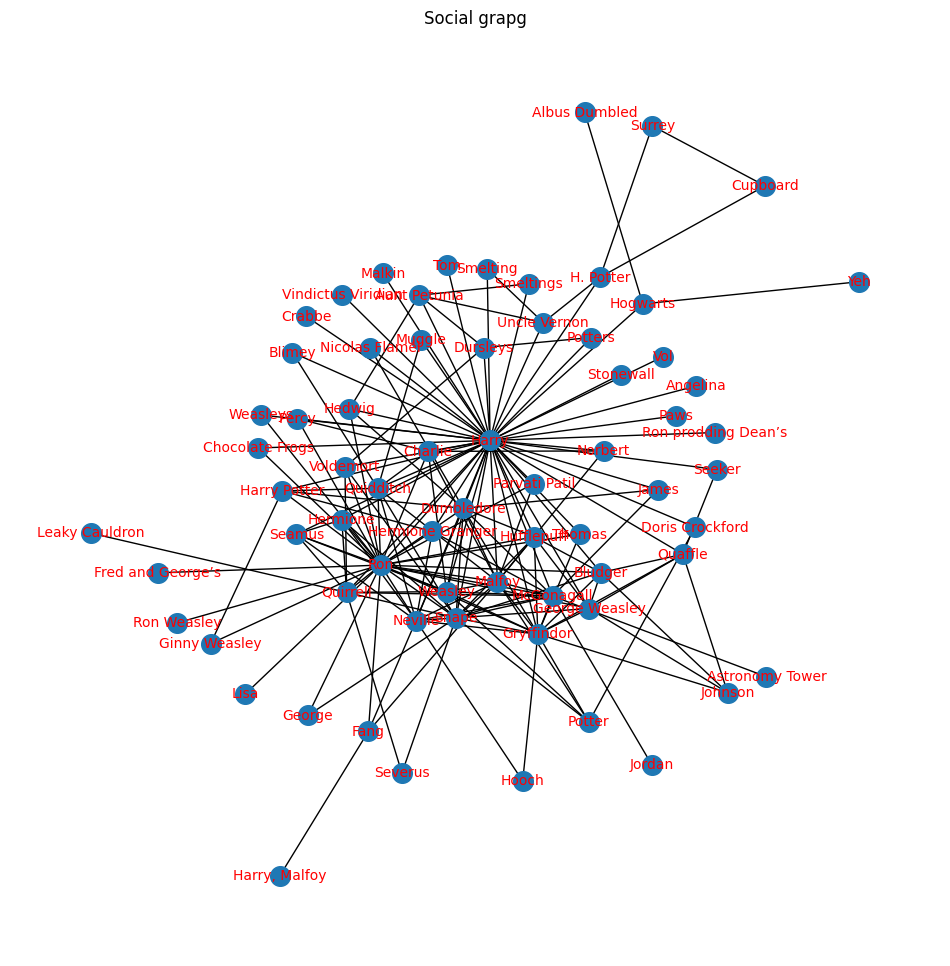

In [45]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(12, 12))
plt.title("Social grapg")
nx.draw(G, pos, with_labels=True, font_size=10, node_size=200, font_color='red')
plt.show()

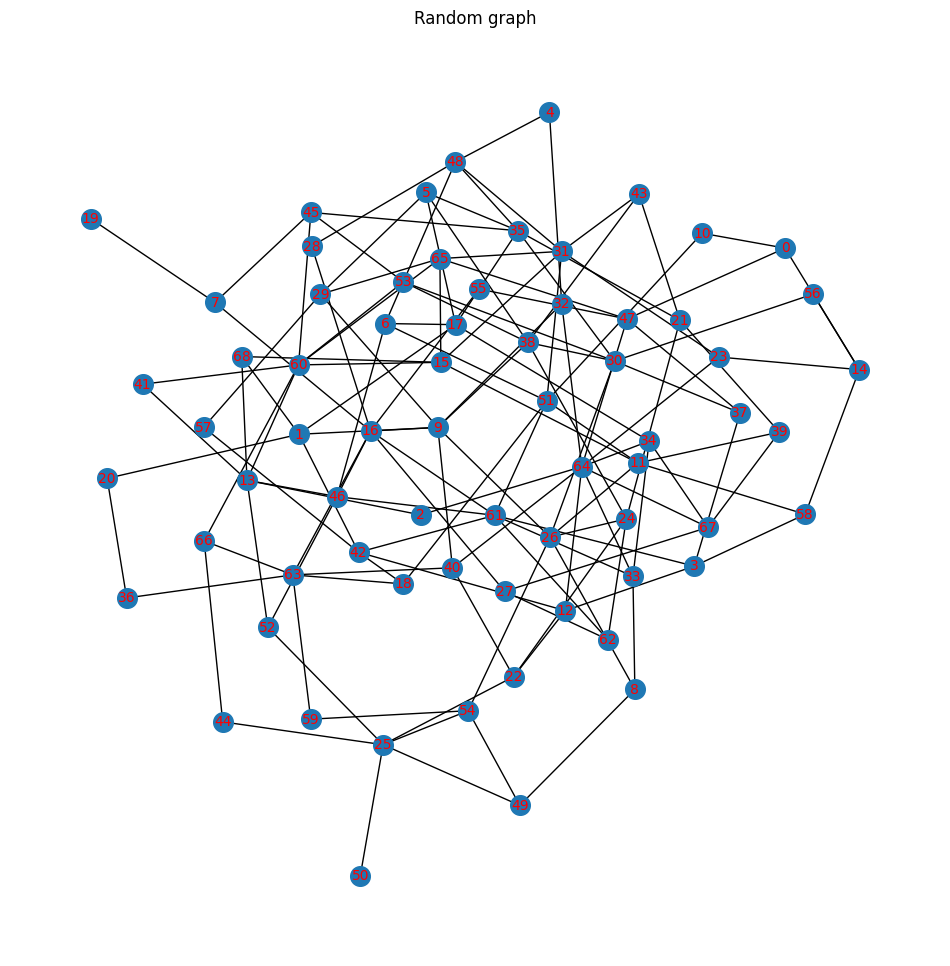

In [46]:
pos = nx.kamada_kawai_layout(random_graph_model)
plt.figure(figsize=(12, 12))
plt.title("Random graph")
nx.draw(random_graph_model, pos, with_labels=True, font_size=10, node_size=200, font_color='red')
plt.show()

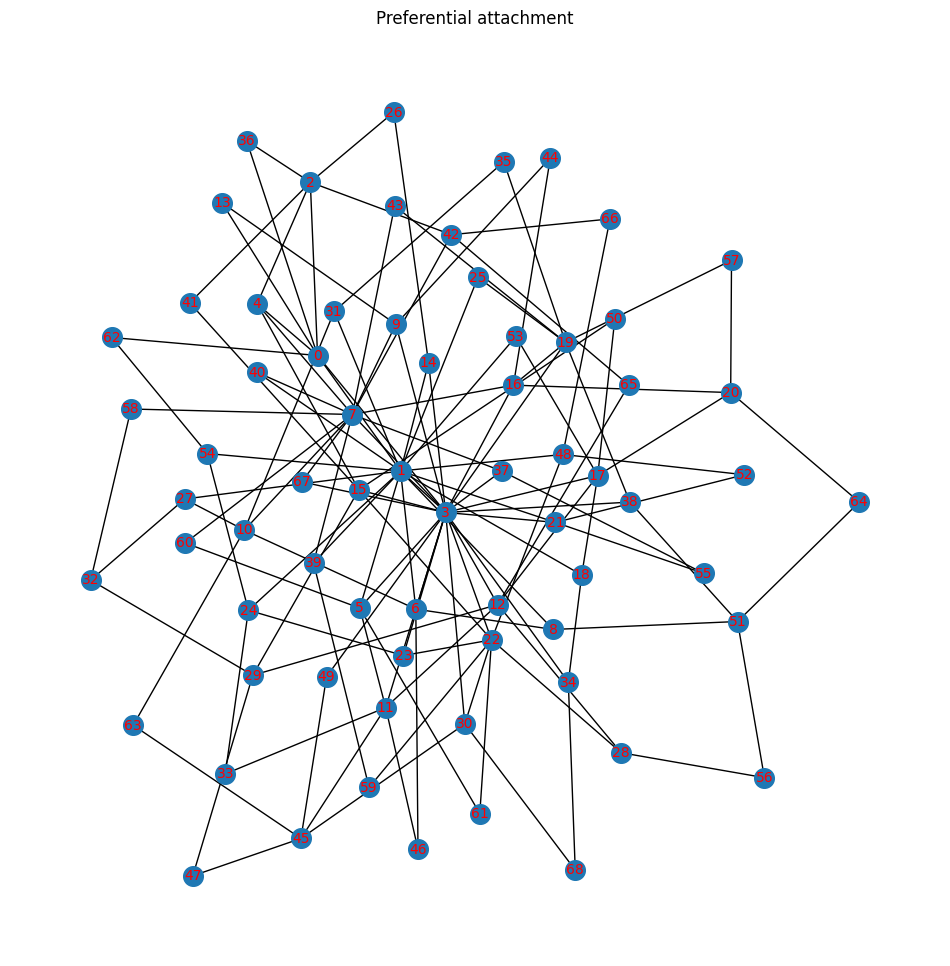

In [47]:
pos = nx.kamada_kawai_layout(preferential_attachment_model)
plt.figure(figsize=(12, 12))
plt.title("Preferential attachment")
nx.draw(preferential_attachment_model, pos, with_labels=True, font_size=10, node_size=200, font_color='red')
plt.show()

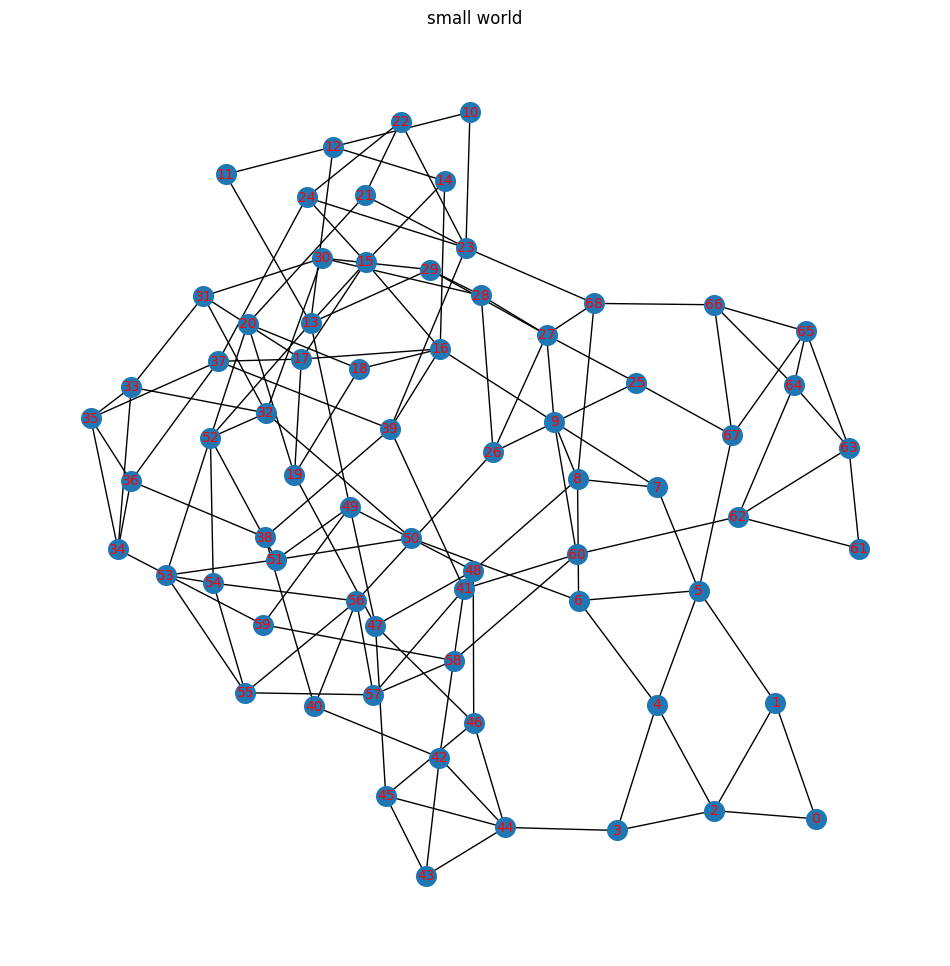

In [48]:
pos = nx.kamada_kawai_layout(small_world_model)
plt.figure(figsize=(12, 12))
plt.title("small world")
nx.draw(small_world_model, pos, with_labels=True, font_size=10, node_size=200, font_color='red')
plt.show()


2.ANALYSIS 

Theme of the analysis: What do you know of the story, and does it match with what you 
got from your network analysis? Have you got any insight to offer?

 The protagonists in the story can be identified based on the centrality measures:<br>
Degree Centrality: Characters with high degree centrality are well-connected and central to the story.<br>
Betweenness Centrality: Characters with high betweenness centrality may act as bridges between different groups of characters.<br> Closeness Centrality: Characters with high closeness centrality are close to many other characters in terms of communication<br>.- PageRank: Characters with high PageRank are considered important based on their connections and the importance of their connection<br>s.


In [53]:
sorted_degree_centrality = dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))

In [56]:
sorted_degree_centrality

{'Harry': 0.7352941176470588,
 'Ron': 0.45588235294117646,
 'Snape': 0.25,
 'Gryffindor': 0.23529411764705882,
 'Malfoy': 0.22058823529411764,
 'McGonagall': 0.19117647058823528,
 'Dumbledore': 0.19117647058823528,
 'Neville': 0.19117647058823528,
 'Quirrell': 0.14705882352941177,
 'Weasley': 0.14705882352941177,
 'Quidditch': 0.1323529411764706,
 'Hufflepuff': 0.11764705882352941,
 'George Weasley': 0.11764705882352941,
 'Bludger': 0.11764705882352941,
 'Charlie': 0.10294117647058823,
 'Harry Potter': 0.08823529411764705,
 'Hermione': 0.08823529411764705,
 'Seamus': 0.08823529411764705,
 'Quaffle': 0.08823529411764705,
 'Aunt Petunia': 0.07352941176470588,
 'Potter': 0.07352941176470588,
 'Voldemort': 0.07352941176470588,
 'Hermione Granger': 0.07352941176470588,
 'Dursleys': 0.058823529411764705,
 'Uncle Vernon': 0.058823529411764705,
 'H. Potter': 0.058823529411764705,
 'Hedwig': 0.058823529411764705,
 'Fang': 0.058823529411764705,
 'Johnson': 0.058823529411764705,
 'James': 0.04411

<br><br>

<u><b>as per the analysis "Harry" is the protagonists in the story and its true <br>
harry is the main character in the book </b></u>

In [57]:
sorted_betweenness_centrality = dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))

In [58]:
sorted_betweenness_centrality

{'Harry': 0.6718081760937337,
 'Ron': 0.19876935083256414,
 'McGonagall': 0.0635803385474149,
 'Hogwarts': 0.058384547848990345,
 'H. Potter': 0.05794556628621598,
 'Snape': 0.04240298770588498,
 'Quirrell': 0.041966114804130615,
 'Gryffindor': 0.03860555964375103,
 'Fang': 0.029411764705882353,
 'Neville': 0.02918908291493893,
 'Malfoy': 0.027854486260983177,
 'Dumbledore': 0.011886605005569009,
 'Quidditch': 0.007739663029390859,
 'Weasley': 0.007460950058623458,
 'George Weasley': 0.00709534831571706,
 'Bludger': 0.00709534831571706,
 'Harry Potter': 0.007082235879426397,
 'Quaffle': 0.004980017787304881,
 'Doris Crockford': 0.00242594506751662,
 'Voldemort': 0.0024143985952589995,
 'Charlie': 0.0019235373932476655,
 'Potter': 0.00167910447761194,
 'Hedwig': 0.0016095990635059993,
 'Uncle Vernon': 0.0015364354697102723,
 'Aunt Petunia': 0.0013169446883230904,
 'Dursleys': 0.0006584723441615452,
 'Hermione Granger': 0.00047190517998244074,
 'Seamus': 0.00039859905970529325,
 'Hufflep

<br><br>
<b><u> the main character are harry,ron and Hermione are the main character of this book<br>
and the first 30 character having highest betweenness_centrality becouse the are also main character  of this book and they bridges between different groups of characters.<br>
but</b></u>


In [59]:
sorted_closeness_centrality= dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))

In [60]:
sorted_closeness_centrality

{'Harry': 0.7816091954022989,
 'Ron': 0.6238532110091743,
 'Snape': 0.5483870967741935,
 'Gryffindor': 0.5396825396825397,
 'Malfoy': 0.5396825396825397,
 'McGonagall': 0.53125,
 'Neville': 0.53125,
 'Dumbledore': 0.5271317829457365,
 'Weasley': 0.5190839694656488,
 'Quirrell': 0.5112781954887218,
 'Quidditch': 0.5,
 'Hufflepuff': 0.5,
 'George Weasley': 0.5,
 'Bludger': 0.5,
 'Hermione': 0.4927536231884058,
 'Seamus': 0.4927536231884058,
 'Charlie': 0.4857142857142857,
 'Voldemort': 0.4857142857142857,
 'Hermione Granger': 0.4857142857142857,
 'Harry Potter': 0.4788732394366197,
 'Thomas': 0.4788732394366197,
 'Hedwig': 0.4722222222222222,
 'Parvati Patil': 0.4722222222222222,
 'Percy': 0.4689655172413793,
 'Chocolate Frogs': 0.4657534246575342,
 'Weasleys': 0.4657534246575342,
 'Quaffle': 0.4657534246575342,
 'Uncle Vernon': 0.4563758389261745,
 'H. Potter': 0.4563758389261745,
 'Norbert': 0.4563758389261745,
 'James': 0.4533333333333333,
 'Aunt Petunia': 0.4533333333333333,
 'Hogwar

4656488,

<br><br>
<b><u> Characters with high closeness centrality are close to many other characters in terms of communication<br>
as we can see above <br>Harry,Ron are close friends and they are the main character
<br> Snape has one of the main role in this book and he is the teacher in harry school of wizards (hogwarts)
 <br> Malfoy and  Neville is the boy who is who's in hogwarts
 <br>McGonagall is the professor in hogwarts<br>
Dumbledore is the principle of the hogwarts school of wizards and witch craft</br></b></u>

In [61]:
sorted_pagerank_centrality= dict(sorted(pagerank_centrality.items(), key=lambda item: item[1], reverse=True))


In [62]:
sorted_pagerank_centrality

{'Harry': 0.13684774520762955,
 'Ron': 0.07527190186603927,
 'Snape': 0.03834687745678075,
 'Gryffindor': 0.035769336789484525,
 'Malfoy': 0.03410576675459511,
 'McGonagall': 0.03222744515308285,
 'Dumbledore': 0.030019883987718113,
 'Neville': 0.029987737025553993,
 'Quirrell': 0.025285744391075754,
 'Weasley': 0.022977080122163606,
 'Quidditch': 0.022312031717019464,
 'George Weasley': 0.018649014361380008,
 'Bludger': 0.018649014361380008,
 'Hufflepuff': 0.01823974646252167,
 'Charlie': 0.017439386788807267,
 'Hogwarts': 0.01582449315156098,
 'Harry Potter': 0.015553516107879094,
 'H. Potter': 0.015450130863683853,
 'Aunt Petunia': 0.015409903068761967,
 'Quaffle': 0.015371933548207681,
 'Seamus': 0.014705885964314047,
 'Hermione': 0.0146745992629818,
 'Uncle Vernon': 0.013540052829596649,
 'Voldemort': 0.01326768724041225,
 'Hermione Granger': 0.012835320687696009,
 'Potter': 0.012707592168452547,
 'Dursleys': 0.012409147819166345,
 'Fang': 0.012178217838189634,
 'Hedwig': 0.011146

<br><br><b><u>
PageRank: Characters with high PageRank are considered important based on their connections and the importance of their connection<br>
like u kan see harry,ron,snape,malfoy etc are importent to this book</b></u>


<br><br><br>
<b>b. Comment on how “real world” the social graph is, i.e. is it based on fact or 
fiction? Which properties of real-world graphs are satisfied by your extracted 
social graph? </b>
<b><u>
<br>The real-world applicability of the social graph depends on the nature of the text (fact or fiction).<br>
 the social graph represents the relationships between fictional characters. <br>
The properties of real-world graphs that can be satisfied include:<br>
<ul><li>
    Small-world property: The existence of relatively short paths between characters, allowing for efficient communication or interaction within the fictional world.
</li>
<li>
    Community structure: Presence of groups or communities of characters with dense connections, reflecting potential factions or alliances in the storyline.
</li>
    <li>
        Hubs: Characters with high centrality may serve as important figures within the fictional narrative, analogous to influential individuals in real-world social networks.
    </li>
</ul>
</b></u>


<br><br><br>

c. A story typically has dynamics. Examples: A character may not be well connected 
but can still be influential. Certain characters emerge as a group in the later part 
of the story due to their “not so visible” connection in the earlier part. Does your 
analysis tell you about the dynamics in the story?

<br><b><u>
as per harry potter novel the main 3 character are harry ,ron,Hermione and voldomort the only and famous villain <br>
but in our analysis harry,ron and snape are the main character for Hermione and voldomort we didn't give that much importance <br>
thats because of for Hermione in book the used hormion for feew time most of the tim they use her last name and miss granger that's the reason we got low cintrality for hermione<br>
as per voldomort in the story he was the strong villain nobody call him with is name all the people in the book call him as "he who must not be named","you know who" and the dark lord so he has low cintrality but is is the one of the main character </u></b>